# Module work № 2


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

### Task № 1

In this task, regression model for non-linear equations will be created and features of the dataset will be explored

In [14]:
df_1 = pd.read_excel('task1.xlsx')
df_1.head()

,t,Y,X1,X2,X3,X4
0,1,31.2,492.9,37.3,54.7,77.4
1,2,33.3,528.6,38.1,63.7,80.2
2,3,35.6,560.3,39.3,69.8,80.4
3,4,36.4,624.6,37.8,65.9,83.9
4,5,36.7,666.4,38.4,64.5,85.5


**a)** To create a regression model for a nonlinear regression equation, you must first convert the nonlinear equation to linear form. Thus, the following four equations will be converted to linear form as follows:


1
\begin{aligned}
\hat{y} = \beta_{0}
    &* x_{2}^{\beta_{2}}
\end{aligned}

\begin{aligned}
ln(\hat{y}) = ln(\beta_{0}
    &* x_{2}^{\beta_{2}})
\end{aligned}

\begin{aligned}
ln(\hat{y}) = ln(\beta_{0})
    &+ \beta_{2} * ln(x_{2})
\end{aligned}

2
\begin{aligned}
\hat{y} = \beta_{0}
    &* x_{1}^{\beta_{1}}
\end{aligned}

\begin{aligned}
ln(\hat{y}) = ln(\beta_{0}
    &* x_{1}^{\beta_{1}})
\end{aligned}

\begin{aligned}
ln(\hat{y}) = ln(\beta_{0})
    &+ \beta_{1} * ln(x_{1})
\end{aligned}

3
\begin{aligned}
\hat{y} = \beta_{0}
    &* x_{1}^{\beta_{1}}
    * x_{2}^{\beta_{2}}
\end{aligned}

\begin{aligned}
ln(\hat{y}) = ln(\beta_{0}
    &* x_{1}^{\beta_{1}}
    * x_{2}^{\beta_{2}})
\end{aligned}

\begin{aligned}
ln(\hat{y}) = ln(\beta_{0})
    &+ \beta_{1} * ln(x_{1})
    + \beta_{2} * ln(x_{2})
\end{aligned}

4
\begin{aligned}
\hat{y} = \beta_{0}
    &* x_{2}^{\beta_{2}}
    * x_{3}^{\beta_{3}}
    * x_{4}^{\beta_{4}}
\end{aligned}

\begin{aligned}
ln(\hat{y}) = ln(\beta_{0}
    &* x_{2}^{\beta_{2}}
    * x_{3}^{\beta_{3}}
    * x_{4}^{\beta_{4}})
\end{aligned}

\begin{aligned}
ln(\hat{y}) = ln(\beta_{0})
    &+ \beta_{2} * ln(x_{2})
    + \beta_{3} * ln(x_{3})
    + \beta_{4} * ln(x_{4})
\end{aligned}

Equations 1 and 2 can be called pairwise regression equations, since they consist of only two parameters. The remaining two equations are multiple regression equations, and the number of parameters in these equations is larger. For example, regression equation 3 has only 2 parameters, and regression equation 4 has 3 parameters. Thus, the last 2 equations take into account more factors that influence the target feature.

Let's logarithm the parameters in the dataset using the natural logarithm function:

In [15]:
df_1['log_X1'] = np.log(df_1.X1)
df_1['log_X2'] = np.log(df_1.X2)
df_1['log_X3'] = np.log(df_1.X3)
df_1['log_X4'] = np.log(df_1.X4)
df_1['log_Y'] = np.log(df_1.Y)

In [16]:
df_1

,t,Y,X1,X2,X3,X4,log_X1,log_X2,log_X3,log_X4,log_Y
0,1,31.2,492.9,37.3,54.7,77.4,6.200306,3.618993,4.001864,4.348987,3.440418
1,2,33.3,528.6,38.1,63.7,80.2,6.270232,3.640214,4.154185,4.384524,3.505557
2,3,35.6,560.3,39.3,69.8,80.4,6.328472,3.671225,4.245634,4.387014,3.572346
3,4,36.4,624.6,37.8,65.9,83.9,6.437111,3.632309,4.188138,4.429626,3.594569
4,5,36.7,666.4,38.4,64.5,85.5,6.501890,3.648057,4.166665,4.448516,3.602777
5,6,38.4,717.8,40.1,70.0,93.7,6.576191,3.691376,4.248495,4.540098,3.648057
6,7,40.4,768.2,38.6,73.2,106.1,6.644050,3.653252,4.293195,4.664382,3.698830
7,8,40.3,843.3,39.8,67.8,104.8,6.737323,3.683867,4.216562,4.652054,3.696351
8,9,41.8,911.6,39.7,79.1,114.0,6.815201,3.681351,4.370713,4.736198,3.732896
9,10,40.4,931.1,52.1,95.4,124.1,6.836367,3.953165,4.558079,4.821088,3.698830


Now you can build linear regression models based on the logarithms of the original features:

In [17]:
import statsmodels.formula.api as smf

In [18]:
model1=smf.ols('log_Y~ log_X2', data=df_1) # модель 1
fitted1=model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     47.86
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           2.49e-06
Time:                        17:20:14   Log-Likelihood:                 22.538
No. Observations:                  19   AIC:                            -41.08
Df Residuals:                      17   BIC:                            -39.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5777      0.311      5.081      0.0

In [19]:
model2=smf.ols('log_Y~ log_X1', data=df_1) # модель 2
fitted2=model2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     259.8
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           9.84e-12
Time:                        17:20:14   Log-Likelihood:                 36.323
No. Observations:                  19   AIC:                            -68.65
Df Residuals:                      17   BIC:                            -66.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7460      0.123     14.204      0.0

In [20]:
model3=smf.ols('log_Y~ log_X1+log_X2', data=df_1) # модель 3
fitted3=model3.fit()
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     213.7
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           2.87e-12
Time:                        17:20:14   Log-Likelihood:                 41.376
No. Observations:                  19   AIC:                            -76.75
Df Residuals:                      16   BIC:                            -73.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0185      0.127     15.937      0.0

In [21]:
model4=smf.ols('log_Y~ log_X2+log_X3+log_X4', data=df_1) # модель 4
fitted4=model4.fit()
print(fitted4.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     87.74
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           9.73e-10
Time:                        17:20:15   Log-Likelihood:                 37.560
No. Observations:                  19   AIC:                            -67.12
Df Residuals:                      15   BIC:                            -63.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3152      0.222     10.450      0.0

Thus, according to the R-squared, the best model is the 3rd model, which takes into account two parameters - the logarithm of average per capita income and the logarithm of the cost of one pound of chickens. The model has a positive coefficient for the income parameter and a negative coefficient for the cost of chickens. It is logical that with an increase of income, the consumption of chicken meat increases, and with a rise of the price of a product, consumption decreases, even if both characteristics are taken logarithmically. The model has significant coefficients according to the t-test, and their confidence intervals do not cross zero. The worst regression model in terms of R-squared is the first one; it is underfitted due to the lack of features used in the model. The model has only one feature - the logarithm of the cost of a pound of chickens, and the weight for this feature is similarly significant. All models are significant in the F test and that in model 4 there is a non-significant parameter for the logarithm of the cost of a pound of pork, the confidence interval of which crosses zero.

**b)** Let's do the Shapiro-Wilk test. It is necessary to test features with a small number of features for normal distribution. Let's check the hypothesis about the normality of data distribution with alpha = 0.05:

In [22]:
print('X1', sc.stats.shapiro(df_1['X1']))
print('X2', sc.stats.shapiro(df_1['X2']))
print('X3', sc.stats.shapiro(df_1['X3']))
print('X4', sc.stats.shapiro(df_1['X4']))

X1 ShapiroResult(statistic=0.896443247795105, pvalue=0.04197002574801445)
X2 ShapiroResult(statistic=0.8548540472984314, pvalue=0.008054640144109726)
X3 ShapiroResult(statistic=0.89530348777771, pvalue=0.04003702849149704)
X4 ShapiroResult(statistic=0.8776261210441589, pvalue=0.01952611841261387)


The results of all tests showed a p-value below 0.05, which means that all features in the data set are not normally distributed

**b)** Let's carry out the Box-Cox transformation for all features. It is needed to convert non-normally distributed data to normally distributed data:

In [23]:
X1_transformed, best_lambda1 = sc.stats.boxcox(df_1.X1)
X2_transformed, best_lambda2 = sc.stats.boxcox(df_1.X2)
X3_transformed, best_lambda3 = sc.stats.boxcox(df_1.X3)
X4_transformed, best_lambda4 = sc.stats.boxcox(df_1.X4)

print('lambda X1:', best_lambda1)
print('lambda X2:', best_lambda2)
print('lambda X3:', best_lambda3)
print('lambda X4:', best_lambda4)

lambda X1: -0.30309360956397147
lambda X2: -0.7909749202080213
lambda X3: -0.2513261638346239
lambda X4: -0.5852037748679675


**с)** Let's perform a Mann-Whitney test to compare features X3 and X4:

In [24]:
sc.stats.mannwhitneyu(X3_transformed, X4_transformed)

MannwhitneyuResult(statistic=361.0, pvalue=1.4798065133032065e-07)

The test showed a p-value below 0.05, which means the alternative hypothesis is accepted and the features are very different from each other

**d)** Let us calculate the Fligner-Clipper criterion to compare the variances of features X2 and X3:

In [25]:
sc.stats.fligner(X2_transformed, X3_transformed)

FlignerResult(statistic=17.56785668435604, pvalue=2.7723506703585003e-05)

The test shows a p-value below 0.05, so the difference between the variances of the two features is significant

t-test is necessary to compare the means of two features:

In [26]:
sc.stats.ttest_ind(X2_transformed, X3_transformed)

Ttest_indResult(statistic=-59.12265456715974, pvalue=1.8753647721205238e-37)

The means of the two features are significantly different, so the null hypothesis is rejected. Thus, the price distributions for chickens and pork are very different from each other - on average, the cost of one pound of chicken is less than the cost of one pound of pork.

### Task № 2

In this task, polynomial features will be created in order to increase R-squared of the model

In [27]:
df_2 = pd.read_excel('task2.xlsx')
df_2.head()

,staff,adverts,projects,profitability
0,8.768088,24.515827,8.499298,142.095390
1,9.129025,27.002612,7.414980,123.296482
2,8.269365,25.496132,6.524985,110.811052
3,9.838063,18.273113,5.211359,90.649576
4,10.382268,11.992892,7.973063,84.343632


Creating polynomial features allows you to generate more features to train a regression model and take into account the influence of one feature on another, however there may bw overfitting with higher degrees of polynomials

Let's split target feature from the rest of dataset:

In [28]:
X_2 = df_2.drop('profitability', axis=1)
y_2 = df_2.profitability

Let's create feature polynomials and compare regression models obtained through the use of features generated by polynomials of degrees from 2 to 5:

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
degrees = list(range(2,6))
r_2_values_train = []
r_2_values_test = []
for deg in range(2,6):
  polynom=PolynomialFeatures(degree=deg)
  X_poly=polynom.fit_transform(X_2)
  X_train, X_test, y_train, y_test= train_test_split(X_poly, y_2, test_size=0.25, random_state=0)
  reg=LinearRegression()
  reg.fit(X_train,y_train)
  r_2_values_train.append(reg.score(X_train,y_train))
  r_2_values_test.append(reg.score(X_test,y_test))

In [34]:
polynom_table = pd.DataFrame({'polynom': degrees, 'R^2 train': r_2_values_train, 'R^2 test': r_2_values_test})
polynom_table

,polynom,R^2 train,R^2 test
0,2,0.913580,0.861281
1,3,0.969758,0.231792
2,4,0.845518,-162.726092
3,5,1.000000,-43106.418464


**a)** Thus, with a polynomial degree of 5, the highest value of R-squared is achieved, equal to one.

**b)** However, overfitting of the model occurs already at the polynomial degree equal to 4, as evidenced by the negative coefficient of R-squared. At high values of the R-squared on the training set, the model tries to adjust to each observation in the data set, and therefore its generalization ability is quite low. Thus, on new test data the model shows unsatisfactory quality and even a negative R-squared. Moreover, as the number of features increases, R^2 tends to increase, which similarly proves that the model is overfitting.

**с)** The most optimal degree of a polynomial is 3rd. At a given degree of polynomial, the model is neither underfitted nor overfitted. In addition, the model is easy to interpret, since the number of features of such a model is small (20) in comparison with features created by polynomials of higher degrees.

In [35]:
PolynomialFeatures(degree=3).fit_transform(X_2).shape

(50, 20)

### Task № 3

In this task, PCA will be applied for the data in order to reduce the amount of features

In [38]:
df_3 = pd.read_excel('task3.xlsx')
df_3.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,96,0,60.96,2.68,186.81,0.67,4.02,45.11,5.93,0.67,705.98,0,42.02,2.68,100.00
1,97,0,55.02,7.42,11.34,2.18,4.36,89.58,3.29,1.31,568.75,2,29.96,4.72,100.00
2,99,0,69.08,51.50,56.98,23.53,28.41,129.33,16.78,9.92,806.07,18,29.21,11.24,41.70
3,101,0,53.54,64.43,59.06,1.34,2.68,86.71,9.09,2.68,675.82,0,21.33,8.51,32.17
4,103,0,61.61,56.86,96.73,19.57,20.31,88.33,13.87,1.85,705.08,6,18.79,3.14,74.96


First, it is necessary to standardize the features:

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
df_3_std = StandardScaler().fit_transform(df_3.drop('id', axis=1))
df_3_std

array([[-0.32485018, -0.61561866, -0.28126379, ...,  0.42425158,
        -0.67851619,  1.1796584 ],
       [-0.32485018, -1.10851642, -0.27364831, ..., -0.38906371,
        -0.4293544 ,  1.1796584 ],
       [-0.32485018,  0.05817423, -0.20282756, ..., -0.43964302,
         0.36698623, -0.65537372],
       ...,
       [-0.32485018,  0.31375085, -0.24308999, ..., -1.6575928 ,
        -0.2656893 , -1.96790956],
       [-0.32485018,  1.62814487, -0.25881901, ...,  0.61780174,
         3.55234873, -1.4044949 ],
       [-0.32485018,  0.65396647, -0.28556959, ...,  1.17552293,
        -0.29622383, -1.96790956]])

**а)** Using a loop, let's go through the number of principal components from 1 to 10 and find the minimum number of components that will explain 75% of the variance in the data:

In [41]:
from sklearn.decomposition import PCA

In [42]:
explained_var = 0.75
for n in range(1,11):
  pca = PCA(n_components = n)
  pca_result = pca.fit_transform(df_3_std)
  sum_explained_var = np.sum(pca.explained_variance_ratio_)
  if sum_explained_var > 0.75:
    break

print('Min amount of principal components: ', n)
print('Rate of explained variance: ', sum_explained_var)

Min amount of principal components:  5
Rate of explained variance:  0.7792865030081405


Thus, at least 5 principal components are needed to explain 75% of the variance

**b)** The main components are linear combinations of eigenvectors to which the maximum eigenvalues with the original features are associated. You can find the eigenvectors using the appropriate code:

In [43]:
pca.components_

array([[ 0.28607737,  0.13099801,  0.3411948 ,  0.32879358,  0.37793811,
         0.3846081 ,  0.32176089,  0.2020661 ,  0.1550142 ,  0.1826431 ,
         0.28062705,  0.09893056,  0.30772848,  0.02711555],
       [-0.02481524, -0.28601704,  0.22033491,  0.20743165,  0.1094939 ,
         0.08495492, -0.13651277, -0.16075792,  0.16134255, -0.49870019,
         0.09218763, -0.59425588,  0.03930942, -0.35270505],
       [ 0.00682614, -0.55206542, -0.06754983, -0.0836795 , -0.07167981,
        -0.03790917,  0.19320196,  0.35538852,  0.34610297, -0.20997499,
        -0.18632046, -0.01268651,  0.17018051,  0.5345039 ],
       [-0.39403135,  0.08923343,  0.25780591,  0.1952913 ,  0.06517335,
         0.00273489, -0.38366955,  0.0737562 ,  0.514355  ,  0.02337712,
         0.18869921,  0.25192991, -0.43578113,  0.14556082],
       [-0.28151793, -0.25887789,  0.31404117,  0.33994   ,  0.05997512,
         0.07193408,  0.11159878, -0.51233973, -0.40257112,  0.09227097,
        -0.18320373,  0.06

Thus, the formulas for the dependence of the 5 main components on the initial features look like this:

1
\begin{aligned}
pc_1 = 0.28x_1+0.13x_2+0.34x_3+0.33x_4+0.38x_5
    &+0.38x_6+0.32x_7+0.20x_8+0.15x_9+0.18x_{10}
    +0.28x_{11}+0.09x_{12}+0.3x_{13}+0.02x_{14}
\end{aligned}

2
\begin{aligned}
pc_2 = -0.02x_1-0.28x_2+0.22x_3+0.2x_4+0.1x_5
    &+0.08x_6-0.13x_7-0.16x_8+0.16x_9-0.49x_{10}
    +0.09x_{11}-0.59x_{12}+0.03x_{13}-0.35x_{14}
\end{aligned}

3
\begin{aligned}
pc_2 = -0.006x_1-0.55x_2+0.067x_3-0.08x_4-0.07x_5
    &-0.03x_6+0.19x_7+0.35x_8+0.34x_9-0.2x_{10}
    -0.18x_{11}-0.01x_{12}+0.17x_{13}-0.53x_{14}
\end{aligned}

4
\begin{aligned}
pc_2 = -0.39x_1+0.08x_2+0.25x_3+0.19x_4+0.06x_5
    &+0.002x_6-0.38x_7+0.07x_8+0.51x_9+0.02x_{10}
    +0.18x_{11}+0.25x_{12}-0.43x_{13}+0.14x_{14}
\end{aligned}

5
\begin{aligned}
pc_2 = -0.28x_1-0.25x_2+0.31x_3+0.33x_4+0.05x_5
    &+0.07x_6+0.11x_7-0.51x_8-0.4x_9+0.09x_{10}
    -0.18x_{11}+0.06x_{12}-0.02x_{13}+0.38x_{14}
\end{aligned}

### Task № 4

In this task, logistic regression model will be built and the quality of model will be evaluated by metrics

In [44]:
df_4 = pd.read_excel('task4.xls')
df_4.head()

,target,age,educ,work_exp,interest,coffee,boss_educ,passport,green,floor,children,climate,offhour,dist,salary,heigh,lunch
0,0,50,4,27,8,1.3,1,0,2,3,2,0,0,10.6,1,176,226
1,0,30,3,10,0,0.0,6,1,2,3,0,0,0,11.5,0,186,226
2,0,43,3,22,7,1.9,6,1,1,5,0,3,0,12.8,1,166,238
3,0,58,3,31,7,2.0,4,0,3,3,1,1,0,15.2,1,180,216
4,1,40,3,23,7,0.0,6,1,3,2,0,0,0,16.1,1,180,286


**а)** Since there are quite a lot of variables in the data set, it is necessary to select features to build a logistic regression model. This can be done in various ways, but in this work we use a correlation matrix and the SelectKBest algorithm based on the F-test. Let's build a correlation matrix and, for clarity, build a heat map of correlations:

In [45]:
df_4.corr()

,target,age,educ,work_exp,interest,coffee,boss_educ,passport,green,floor,children,climate,offhour,dist,salary,heigh,lunch
target,1.000000,0.030904,0.046247,0.024676,-0.266240,-0.316441,0.042071,0.185342,-0.040751,-0.011566,-0.061014,-0.267805,0.266213,0.245826,-0.099234,0.038524,0.009652
age,0.030904,1.000000,0.193965,0.966593,-0.018100,0.022193,0.100664,0.027025,0.011081,-0.048146,0.079317,0.032328,0.001648,-0.007591,0.025933,0.061677,0.003041
educ,0.046247,0.193965,1.000000,0.172928,0.111074,-0.135974,0.488038,0.042000,0.065762,-0.036958,-0.026367,-0.008393,0.013761,-0.065000,-0.008323,0.017131,0.016025
work_exp,0.024676,0.966593,0.172928,1.000000,-0.018489,0.034827,0.085922,0.005739,0.003019,-0.036442,0.071044,0.037314,-0.000113,0.012256,0.028183,0.069176,0.007424
interest,-0.266240,-0.018100,0.111074,-0.018489,1.000000,0.071774,0.047040,-0.072606,0.059619,-0.095220,-0.024070,0.066103,-0.198222,-0.179107,0.052766,-0.008052,-0.013930
coffee,-0.316441,0.022193,-0.135974,0.034827,0.071774,1.000000,-0.046351,-0.255269,0.004050,0.104948,0.087436,0.029701,-0.034376,0.065100,0.048929,-0.042351,-0.093563
boss_educ,0.042071,0.100664,0.488038,0.085922,0.047040,-0.046351,1.000000,-0.002639,0.066961,0.002158,-0.080723,0.005633,-0.009352,-0.076671,-0.013197,0.052343,-0.035486
passport,0.185342,0.027025,0.042000,0.005739,-0.072606,-0.255269,-0.002639,1.000000,-0.044844,0.025053,-0.052250,-0.052288,0.010004,-0.045631,-0.017975,0.054919,0.048082
green,-0.040751,0.011081,0.065762,0.003019,0.059619,0.004050,0.066961,-0.044844,1.000000,-0.091434,-0.049071,0.096890,0.051826,-0.107737,0.013901,0.009076,-0.011348
floor,-0.011566,-0.048146,-0.036958,-0.036442,-0.095220,0.104948,0.002158,0.025053,-0.091434,1.000000,-0.043882,0.004191,0.023086,0.199300,0.014560,0.015944,0.290174


Text(0.5, 1.0, 'Correlation matrix')

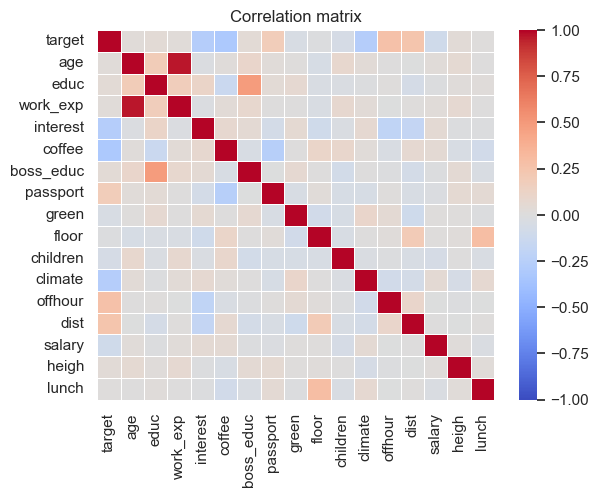

In [64]:
sns.heatmap(data=df_4.corr(), cmap='coolwarm', vmin=-1, vmax=1, linewidth=.5)
plt.title("Correlation matrix")

As the correlation matrix shows, the most correlated features with the target variable (with a correlation coefficient module greater than 0.2) are the features `interest`, `coffee`, `climate`, `offhour` and `dist`. Based on intuition and experience, all features can be used in further analysis, since an employee’s loss of interest in work and dissatisfaction with the work atmosphere is one of the significant reasons for dismissal, as well as the long distance from home to the place of work and the availability of working off

In [47]:
from sklearn.feature_selection import SelectKBest, chi2

In [48]:
X = df_4.drop('target', axis=1)
y = df_4.target
X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
X_new

array([[ 8. ,  1.3,  0. ,  0. , 10.6],
       [ 0. ,  0. ,  0. ,  0. , 11.5],
       [ 7. ,  1.9,  3. ,  0. , 12.8],
       ...,
       [ 9. ,  2. ,  4. ,  0. ,  9.8],
       [ 7. ,  0. ,  3. ,  1. , 12.6],
       [ 1. ,  0. ,  1. ,  1. , 16.6]])

The `SelectKBest` algorithm selected the same features as correlation matrix. This means that the attributes `interest`, `coffee`, `climate`, `offhour` and `dist` will be used to build a logistic regression model.

To get better results from the model, you need to normalize the data:

In [49]:
X = df_4[['interest', 'coffee', 'climate', 'offhour', 'dist']]

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()
scaler.fit(X)
X_norm=scaler.transform(X)

Let's divide data into training and test samples:

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

Model training:

In [54]:
import statsmodels.api as sm

In [55]:
logit_model=sm.Logit(y,X_norm)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.454146
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.276     
Dependent Variable: target           AIC:              903.7600  
Date:               2023-12-25 17:22 BIC:              928.2181  
No. Observations:   984              Log-Likelihood:   -446.88   
Df Model:           4                LL-Null:          -616.93   
Df Residuals:       979              LLR p-value:      2.4063e-72
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       -1.8226     0.2426    -7.5140   0.0000   -2.2981   -1.3472
x2       -3.6715     0.3593   -10.2181   0.0000   -4.3758 

As can be seen from the summary, the quality of class prediction by logistic regression model is good. The pseudo R^2 value is low. Variables `interest`, `coffee` and `climate` negatively affect the probability of an employee dismissal, while the variables `offhour` and `dist` have a positive effect on dismissal. All coefficients are significant, as proven by the z-test and as seen by the confidence intervals. The feature `coffee` brings the greatest weight into the model, with which the correlation coefficient with the target variable is as far away from zero as possible.

**b)** Let's analyze logistic model errors using confusion matrix and quality metrics:

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
clf_norm=LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
y_pred_norm = clf_norm.predict(X_test)

In [58]:
sns.set_theme(style="white")

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Confusion Matrix : 
 [[190  21]
 [ 69  45]]
Accuracy :  0.7230769230769231
Precision score:  0.6818181818181818
Recall score:  0.39473684210526316
F1 score:  0.5


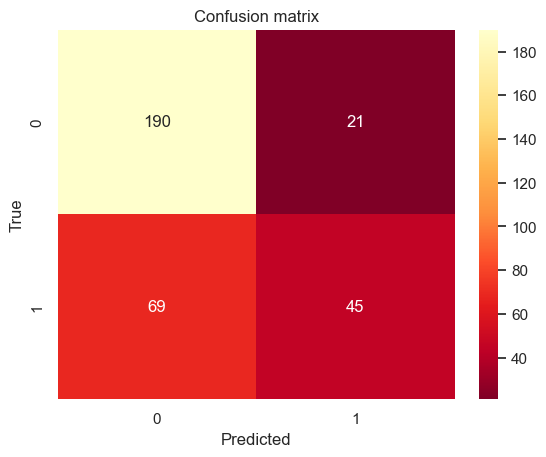

In [60]:
cm_standard = confusion_matrix(y_test, y_pred_norm)
print("Confusion Matrix : \n", cm_standard)
print("Accuracy : ", accuracy_score(y_test, y_pred_norm))
print('Precision score: ', precision_score(y_test, y_pred_norm))
print('Recall score: ', recall_score(y_test, y_pred_norm))
print('F1 score: ', f1_score(y_test, y_pred_norm))

sns.heatmap(cm_standard, annot=True, cmap='YlOrRd_r', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title('Confusion matrix')
plt.show()

There are quite a lot of correctly classified observations in the confusion matrix (190 employees who stayed and 45 employees who left), but there are also quite a lot of incorrectly classified observations - they make up approximately 30% of all observations. Due to class imbalance, the model strives to evaluate as many employees as possible who will remain with the company. As many as 69 employees were actually laid off, but the model classified the employees as class zero. This is why the recall rate turned out to be quite low. In turn, the precision is higher due to the small number of employees who actually remained in the company, but the model predicted that there were 21 people who left. The F score was low due to the influence of recall.

Before building the ROC curve, it is necessary to obtain the probabilities of the predicted classes:

In [61]:
y_pred_log = clf_norm.predict_proba(X_test)

Now we can build ROC curve and caculate ROC-AUC score:

In [62]:
from sklearn.metrics import roc_curve

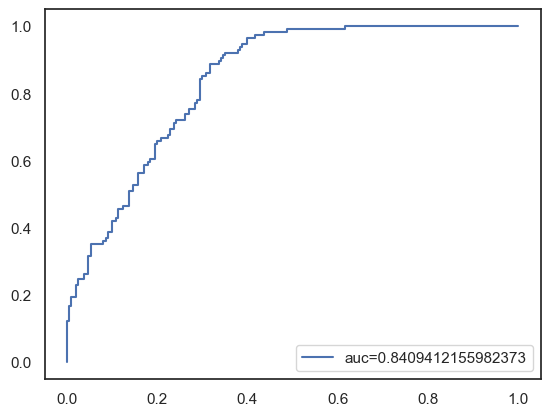

In [63]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_log[:, 1])
auc_log = roc_auc_score(y_test, y_pred_log[:, 1])
plt.plot(fpr_log,tpr_log,label="auc="+str(auc_log))
plt.legend(loc=4)
plt.show()

The roc curve shows a fairly good location on the graph, since the area under the curve is equal to 0.84. This indicates good classification quality. Thus, the model quality metrics showed that the model's prediction quality is good.